In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import os
plt.rcParams["font.family"] = "Inter"
plt.rcParams["figure.dpi"] = 300

In [73]:
# LR
# confusions = {
#     'elections': np.array([[1633, 302],[863, 613]]).T,
#     'politics': np.array([[333, 431],[118, 736]]).T,
#     'white_house': np.array([[282, 231],[153, 416]]).T,
#     'immigration': np.array([[134, 257],[52, 472]]).T,
#     'healthcare': np.array([[106, 316],[25, 456]]).T,
#     'total': np.array([[2488, 1537],[1211, 2693]]).T
# }

# NN
confusions = {
    'elections': np.array([[1651, 739], [284, 737]]),
    'politics': np.array([[462, 210], [302, 644]]),
    'white_house': np.array([[349, 225], [164, 344]]),
    'immigration': np.array([[196, 71], [195, 453]]),
    'healthcare': np.array([[285, 139], [137, 342]]),
    'total': np.array([[2943, 1384], [1082, 2520]])
}

In [74]:
def init_saveplace():
    route = os.path.join('.', 'renders')
    os.makedirs(route, exist_ok=True)
    return route

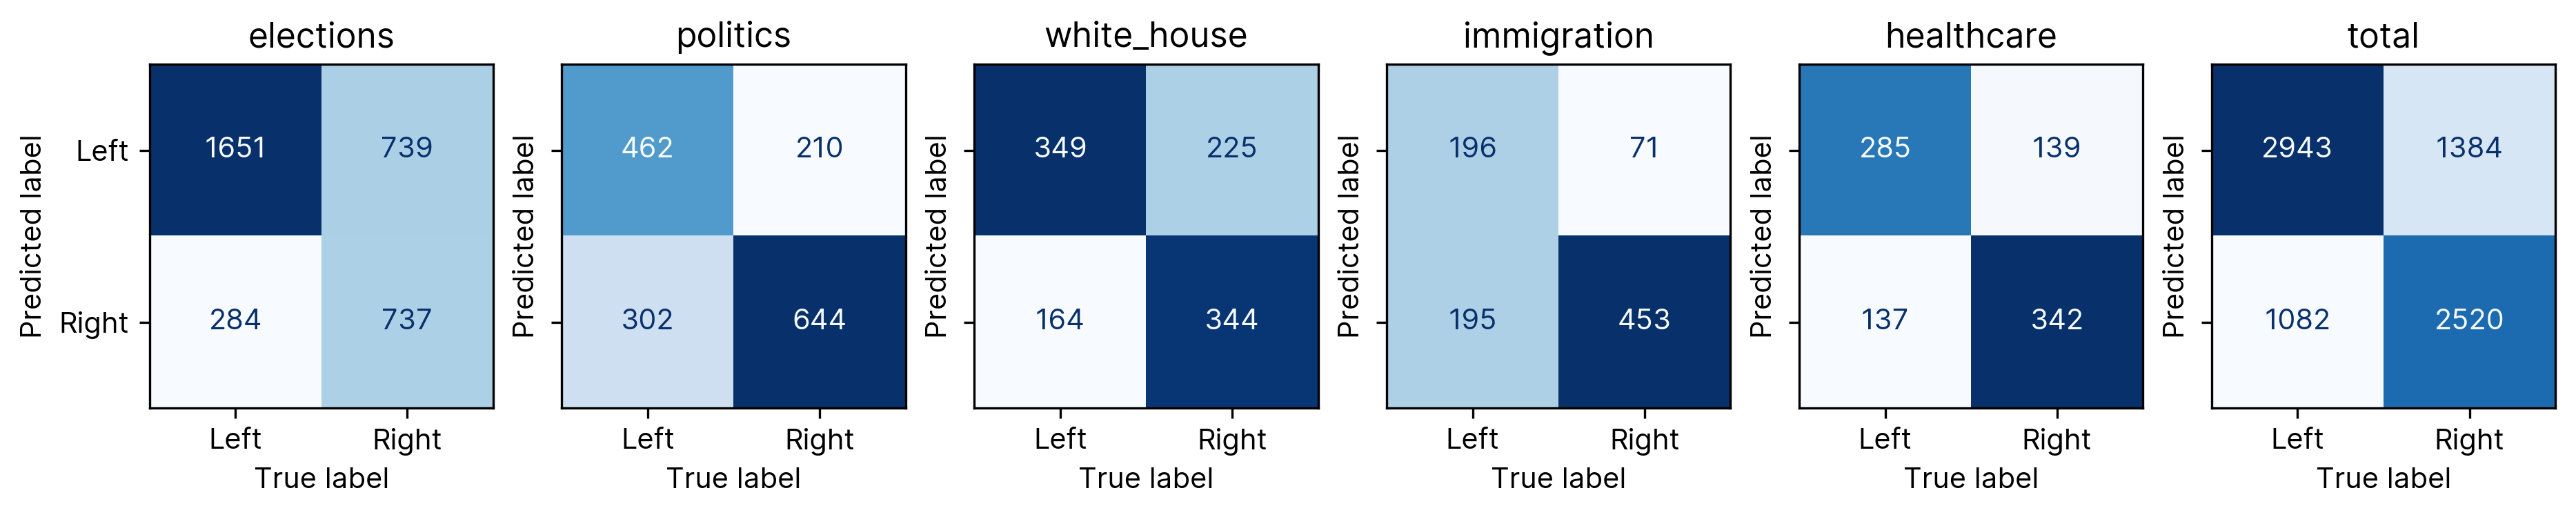

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=len(confusions), figsize=(15,4), sharey='all', sharex='all')
alignments = ['Left', 'Right']

for ax, (dataset, matrix) in zip(axes, confusions.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                  display_labels=alignments).plot(
                                      ax=ax,
                                      colorbar=False,
                                      cmap="Blues"
                                  )
    ax.title.set_text(dataset)
    ax.set(
        xlabel="True label",
        ylabel="Predicted label"
    )

saveplace = init_saveplace()
plt.savefig(os.path.join(saveplace, 'nn-confusion.png'), transparent=True)